<a href="https://colab.research.google.com/github/chrysshawk/Coursera_Capstone/blob/master/IBM_Applied_Data_Science_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM Applied Data Science Project: Identifying Business Opportunities


##Table of Contents

1. [Introduction](#introduction)
2. [Project Data](#project-data)
3. [Methodology](#methodology)
4. [Results](#results)
5. [Discussion](#discussion)
6. [Conclusion](#conclusion)

##1. Introduction / Business Problem <a name="introduction"></a>

###1.0 Problem Description

This project aims to help prospective investors and entrepreneurs within the food/restaurant category to establish a new business that is likely to succeed. To be specific, we are going to provide an answer to this **business problem:**   
- Given a user-defined city, how can we collect and use market information to recommend where we should establish a restaurant, as well the restaurant type- and price range?


###1.1 Problem Background
The task of establishing a new venue is usually challenging: One needs to perform market research about the potential areas, identifying what the competition is doing, what the characteristics are of existing well-performing and poor-performing ventures, as well as identifying any missing market segments that could be fulfilled.

This should be of interest to prospective investors, entrepreneurs, as well as to existing restaurant owners who might want input in how to improve the popularity of their restaurant. Additionally, this would provide useful to other investors in the general area.

###1.2 Project solution
This project will assist in the above by automating parts of the process by collecting information about the given area and the venues in the surrounding area. For this purpose it will use data from FourSquare, which is one of the largest repositories of venue information, especially pertaining to the restaurant business, and which venues have the highest popularity.  

We will then analyze the characteristics of the venues that are already successful to provide recommmendations as to where the restaurant should be located, as well as which type/category of restaurant is likely to succeed, and which price ranges it should fall within.

###1.3 Project Definition and Scope
Specifically, this project aims to answer the following business questions:
1. In which postal area should a restaurant business be located?
2. Which venue category is most likely to succeed?
3. Should the given restaurant be within any given price ranges?

The output of the project will be a recommendation to the above business questions, as well as giving insight into the overall characteristics of the given areas and various restaurants' popularity.

The input required for the project by the user is as follows:
1. Which city should be analyzed
2. Which radius surrounding the city's centre should be analyzed

For the purpose of this project, we are going to investigate the city of Las Vegas in Nevada, United States, including all surrounding areas of the city centre by a radius of 15 kilometers.

Of course, the overall recommendation will only form a part of the required analysis of establishing a venture, yet it will give insight into what features make the existing restaurants popular in that area.

##2. Project Data <a name="project-data"></a>

###2.0 Data Requirements
In order to solve the business problem, we need two kinds of data:
1. **Locational Data** about the areas we are analyzing
2. **Venue Data** about the venues we are analyzing

In the below sections, we will detail the sources of these data, as well as how they will be used in this project.


####2.0.0 Locational Data 
One of the most important aspects in establishing a restaurant is to ensure the location is right. As such, we will need accurate locational data to effectively perform our analysis and evaluation.

**Data about geolocational position (Geocoder)**  

To effectively analyze the area, we need to establish the geolocational position about the location we are analyzing. Specifically, we need to know the latitude and longitude of the location.  

*Source:*  

We will use the Geocoder library in Python for this purpose (https://geocoder.readthedocs.io/), and specifically use the Arcgis source of data to ensure the data is consistent in case the user selects different locations and countries in the analysis.  

*Data Example:* 
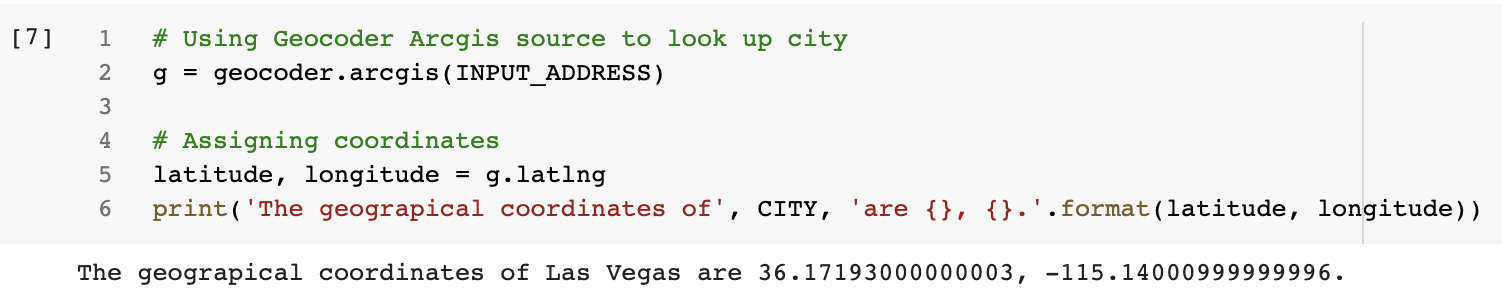
   

**Data about zip/postal codes of the surrounding area (GeoNames API)**  

Once we know the geolocational data above, we will need to get details about the zip/postal codes in the surrounding area with the defined radius limit. This will also need to include the geolocational position of each of the postal codes, as well as the name of the city/location associated with each postal code.  

*Source:*   

We are going to rely on the data and functionality as provided by Geonames's API service (http://www.geonames.org/). The GeoNames API will look up zip/postal code information surronding the geolocational position, including the geospatial data of these zip/postal codes. This also accepts reverse geocoding, that is, the possibility to provide a given set of location information of a given postal code. One needs to register with Geonames API to get this data, which is free. For the purpose of this project, we will use the "findNearbyPostalCodes" endpoint, in JSON format (link: http://api.geonames.org/findNearbyPostalCodesJSON).  

  
*Data Example:*  
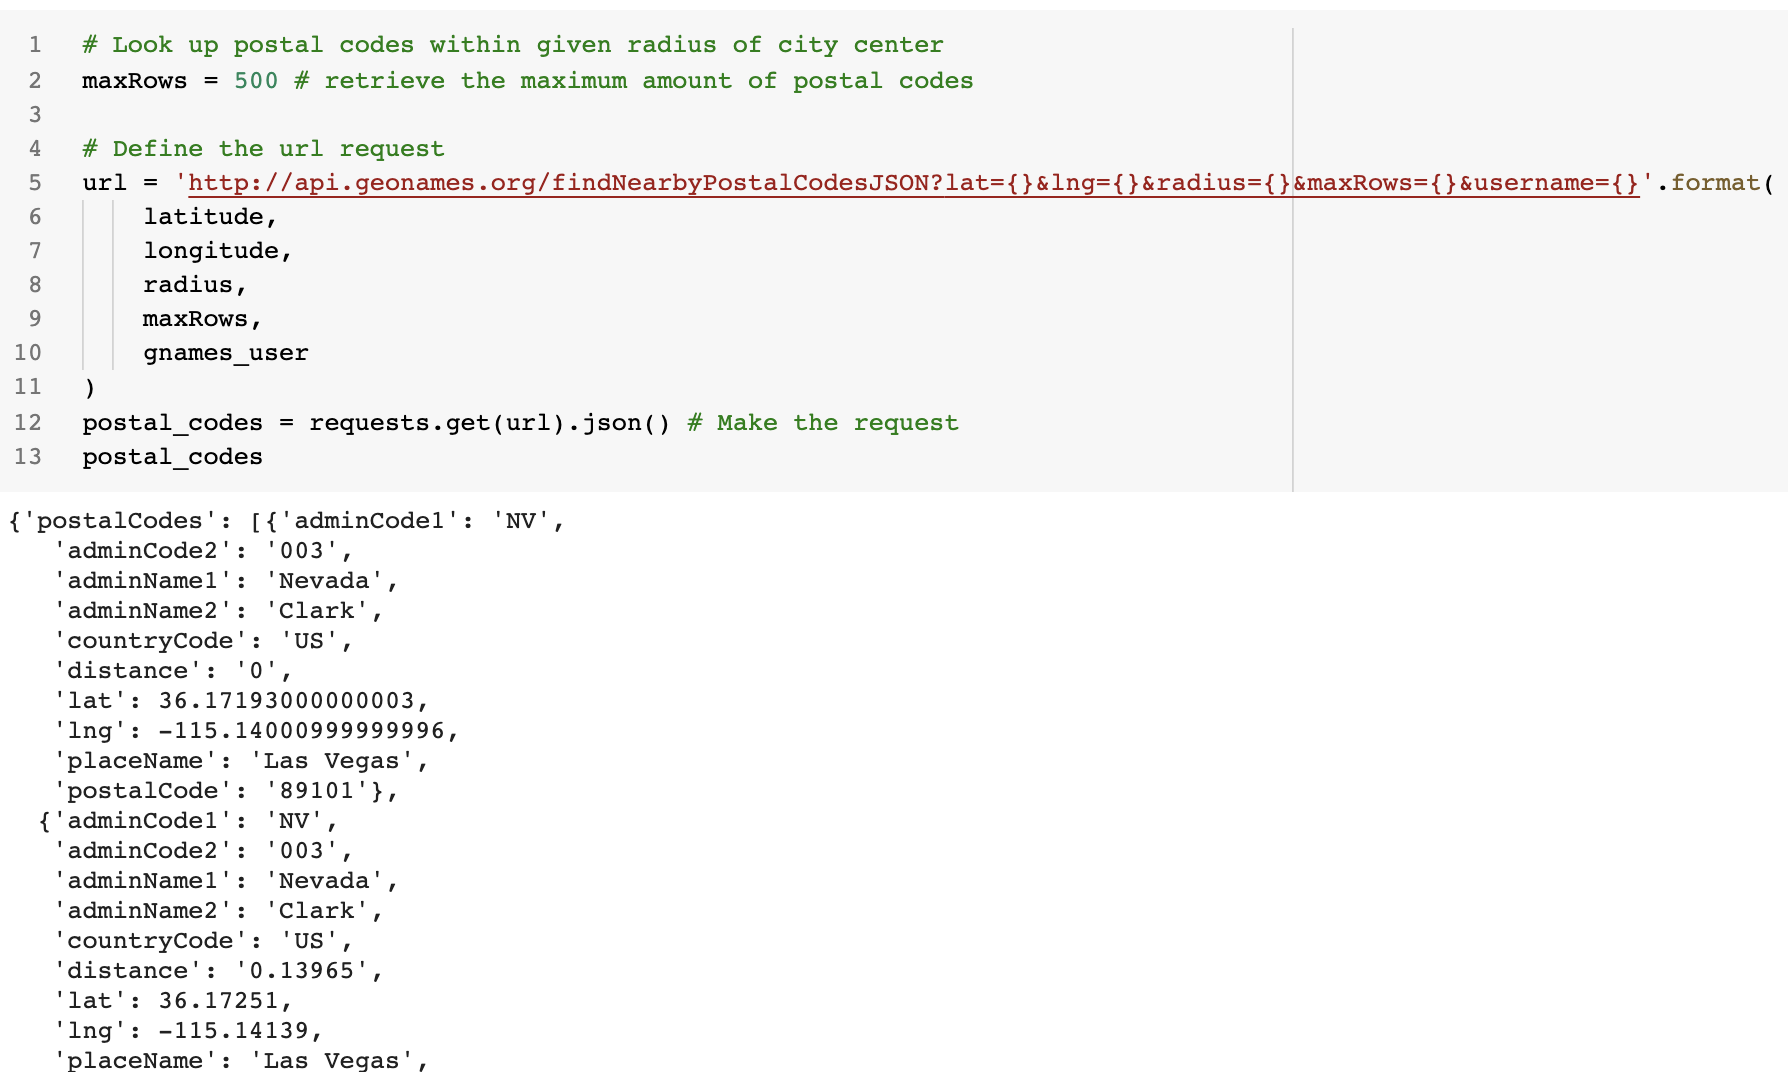

####2.0.1 Venue Data
Secondly, we need to retrieve data about the relevant restaurant venues in the areas we are analyzing. Specifically, we will need data about:
  - Venue ID
  - Venue Popularity
  - Venue Price Range (1-4, 1=least expensive, 4=most expensive)
  - Venue Category
  - Venue Postal Code
  - Venue geospatial location

*Source:*  
We will use Foursquare's [Places API](https://developer.foursquare.com/docs/places-api/endpoints/) to fetch data about the most popular venues in the given area. For this purpose, we will need to set up a free account with Foursquare, which allows for up to 950 regular calls per day. In this project we will only use regular calls, using Foursquare's API GET requests toward the following Endpoint group and Endpoint:
- Endpoint group: Venue
- Endpoint: Explore

Documentation of the above is available at [FourSquare API Endpoint documentation](https://developer.foursquare.com/docs/api-reference/venues/explore/)

Given the selected location, we will make multiple calls towards the FourSquare API to fetch as many venues as are available (cap at 500) and ask Foursquare to rank them according to popularity. This feature will be essential for our analysis, since we are interested in identifying what characteristics makes for a popular venue.  

However, since we also need to get data about the various price ranges of the various venues, we will make calls to the same endpoint for each price range. That way we will be able to know which price category each venue is associated with.

*Data Example:*

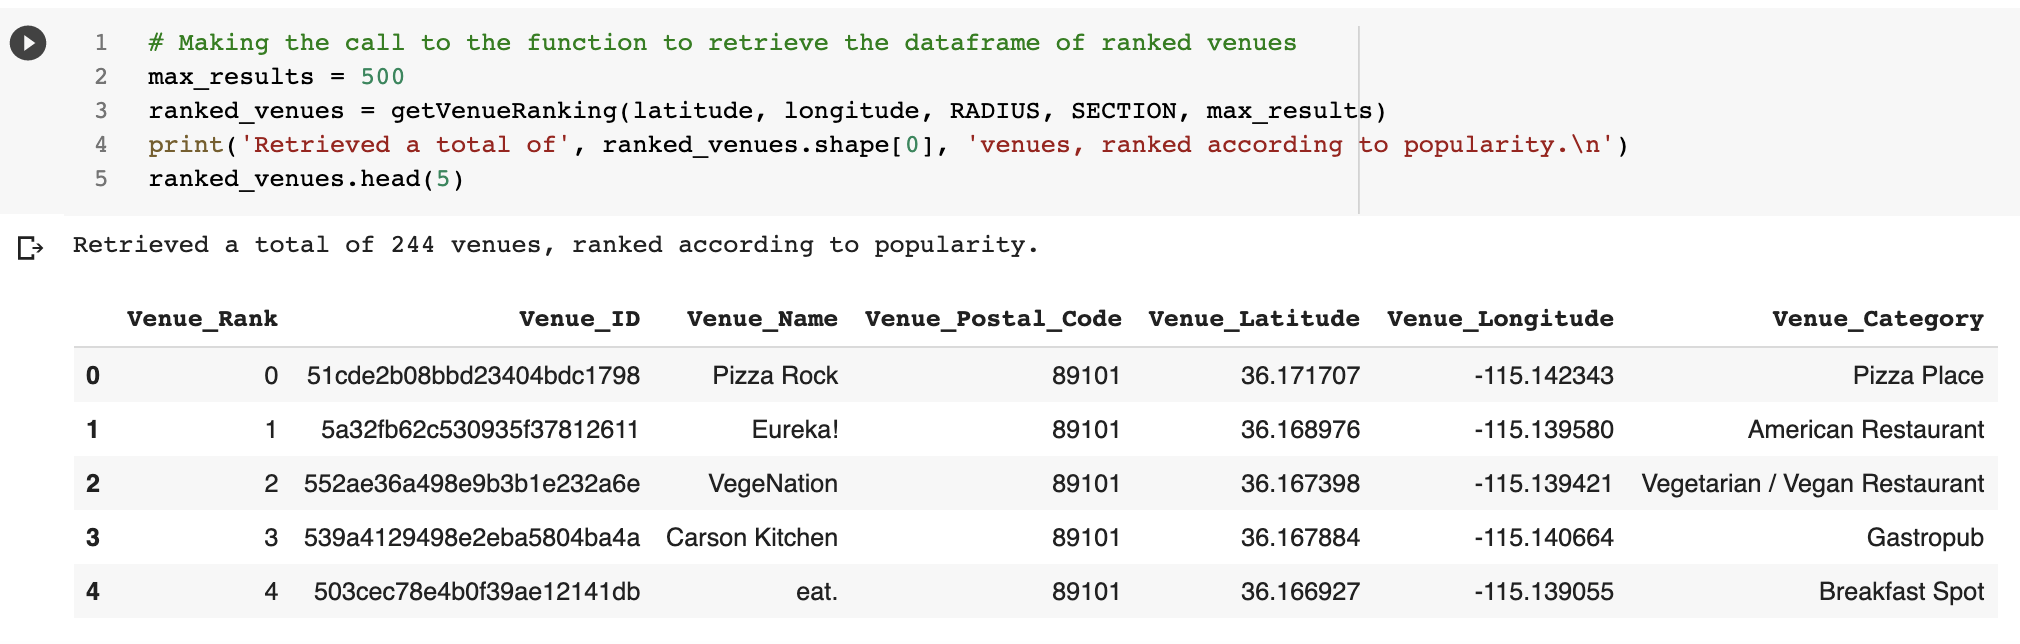

###2.1 Use of Data for Analysis

####2.1.0 Data collection and pre-processing:  
Given the above data requirements and data sources, we will collect and pre-process data in the following steps:
1. Define our input parameters for the project. This includes:
  - Defining the city/location we will analyze
  - Defining the radius of the surrounding area to include in the scope
  - Entering the credentials for GeoNames- and FourSquare APIs
2. Retrieve the geospatial coordinates of our chosen location using Geocoder
3. Retrieve the postal codes, area names, and associated coordinates of the specified area using GeoNames API
4. Retrieve a list of the restaurant/food venues in the relevant areas from FourSquare, sorted by popularity
5. For each price range of the venues, retrieve which range they belong to
6. Consolidate the above, creating a dataframe containing the popular venues with their associated price ranges, and their associated location and postal code data (postal code, area name, and geospatial coordinates)

Through the above we will have a dataframe that can be used in our analysis,  containing a list of venues, ranked by popularity, their price category, their geospatial coordinates, as well as their associated postal code details, including the area name, and postal code geolocational position.

*Data Example:*

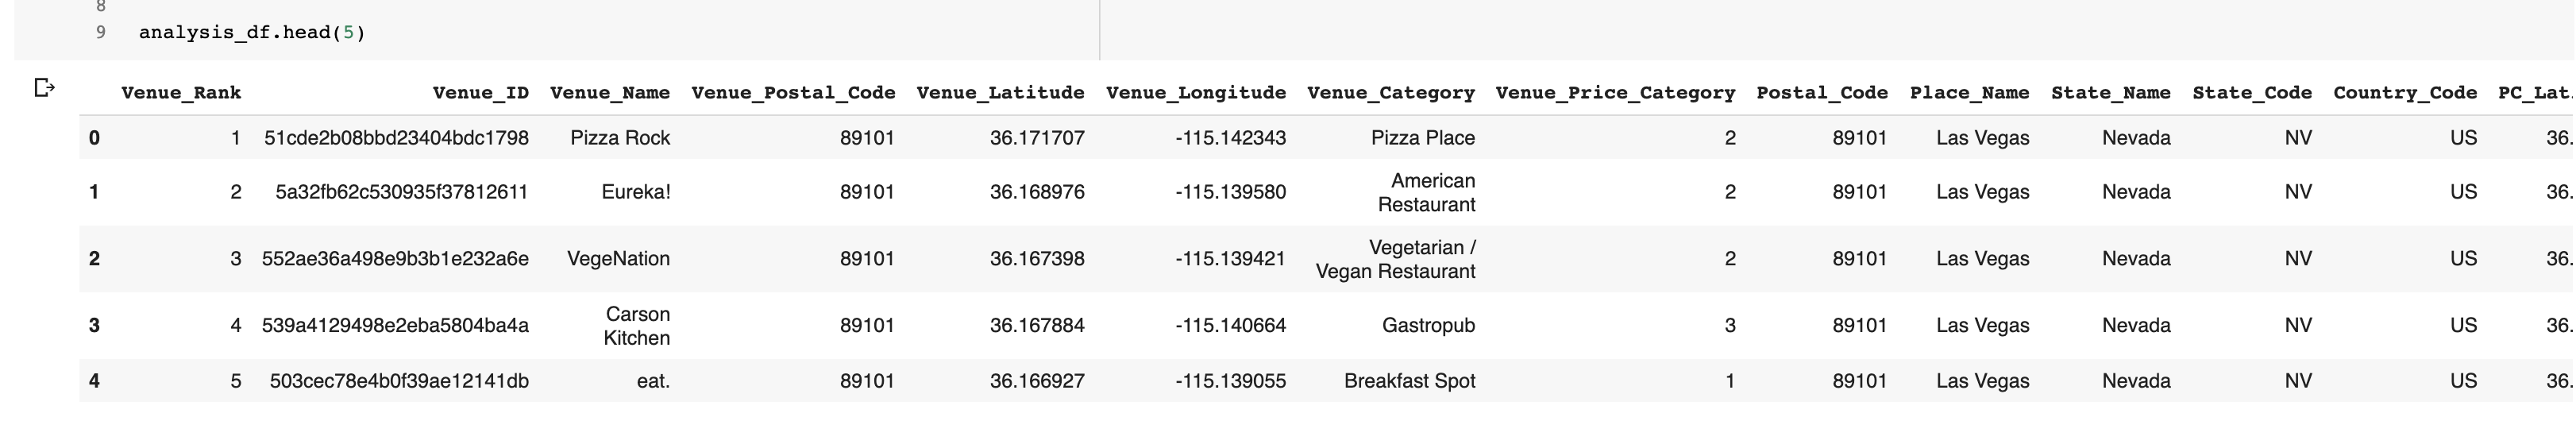

####2.1.1 Data analysis 
When we have the above data, we are in a position to carry out the analysis part of our project.  

The above data will help us in determining which characteristics make for a popular venue, as well as giving insight into the importance of each postal area, the category of the restaurant venue, and its associated price range.

This will be used to create a recommendation about the following:
- Where venues are more likely to be popular
- Which venue categories are popular
- Which price ranges are popular

Given the above recommendations, we should be in a good position to use the gathered information as input in our evaluation of establishing a new restaurant.

The specifics of this analysis will provided in the next section; Methodology.



##3. Methodology <a name="methodology"></a>

In this section, we will discuss and describe how we have analyzed and evaluated the data for this project. 

We have done through three parts:
1. Exploratory data analysis
2. Determining a statistical metric for identifying potential business opportunities
3. Applying machine learning using k-Means clustering to investigate if this could be useful in categorizing the features of the popular venues

Given the above, we should be able to provide insight as to what might be predictors of success.

###3.0 Exploratory data analysis

First, we are going to carry out some exploratory analysis of the dataset. The purpose of exploratory data analysis is to investigate the overall data we are working with as well as identifying potential patterns and problems in the dataset.

In this section we will explore the following:  
1. The number of venues, postal codes, price ranges, and venue categories we are working with in the dataset.
2. Which postal areas have most venues, and the best ranked venues
3. Which venue types are most numerous, and which category has the best average rank
4. Which price ranges are most popular, and if there seems to be a link between venue rating and venue price range

To begin with, this analysis comprises a total of 238 venues, of which have 30 different venue categories, within 30 different postal areas.

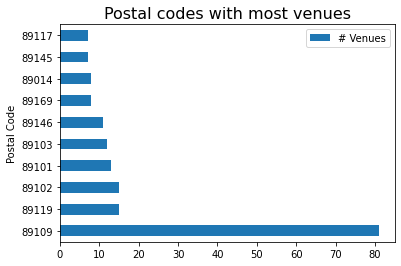

### Inferential statistical testing

###Machine learning

##4. Results <a name="results"></a>

**Results section where you discuss the results.**

##5. Discussion <a name="discussion"></a>

**Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.**


In this analysis, we have investigated the data we need to assess a number of details about what makes a venue popular.

Topics to mention:
- Sample size
- Quality of data
- Oddities
- Further research
- Conclusions & validity

##6. Conclusion <a name="conclusion"></a>

Conclusion section where you conclude the report.

This project has illustrated how data can be collected and used in order to identify possible business opportunities in a given area. 